In [2]:

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import wfdb

In [3]:
file = open('C:/Users/guill/Documents/Python Scripts/PFE/ECG-Arrhythmia-classification/mit-bih-arrhythmia-database-1.0.0/RECORDS')
records = file.readlines()
file.close()

In [73]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [4]:
good = ['N']
leftBundleBlocks = ['L']
rightBundleBlocks = ['R']
atrialContraction = ['A']
ventricularContraction = ['V']
paced = ['/']
ventricularEscape = ['E']
ventricularFlutterWave = ['!']

In [5]:
def segmentation(typeBeat):

    liste = []

    for e in records:
        signals, fields = wfdb.rdsamp('./mit-bih-arrhythmia-database-1.0.0/' + e[0:-1], channels = [0]) 

        ann = wfdb.rdann('./mit-bih-arrhythmia-database-1.0.0/' + e[0:-1], 'atr')
       
        ids = np.in1d(ann.symbol, typeBeat)
        imp_beats = ann.sample[ids]
        beats = (ann.sample)
        for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                liste.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
    
    liste = liste[1:]                
    return liste

In [6]:
NORMAL = segmentation(good) 
LBB = segmentation(leftBundleBlocks)
RBB = segmentation(rightBundleBlocks)
APC = segmentation(atrialContraction)
PVC = segmentation(ventricularContraction)
VEB = segmentation(ventricularEscape)
PAB = segmentation(paced)
VFW = segmentation(ventricularFlutterWave)

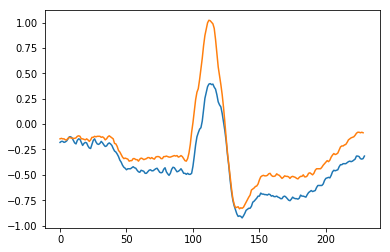

In [7]:

plt.plot(LBB[0])
plt.plot(LBB[500])

In [8]:
len(LBB)

8071